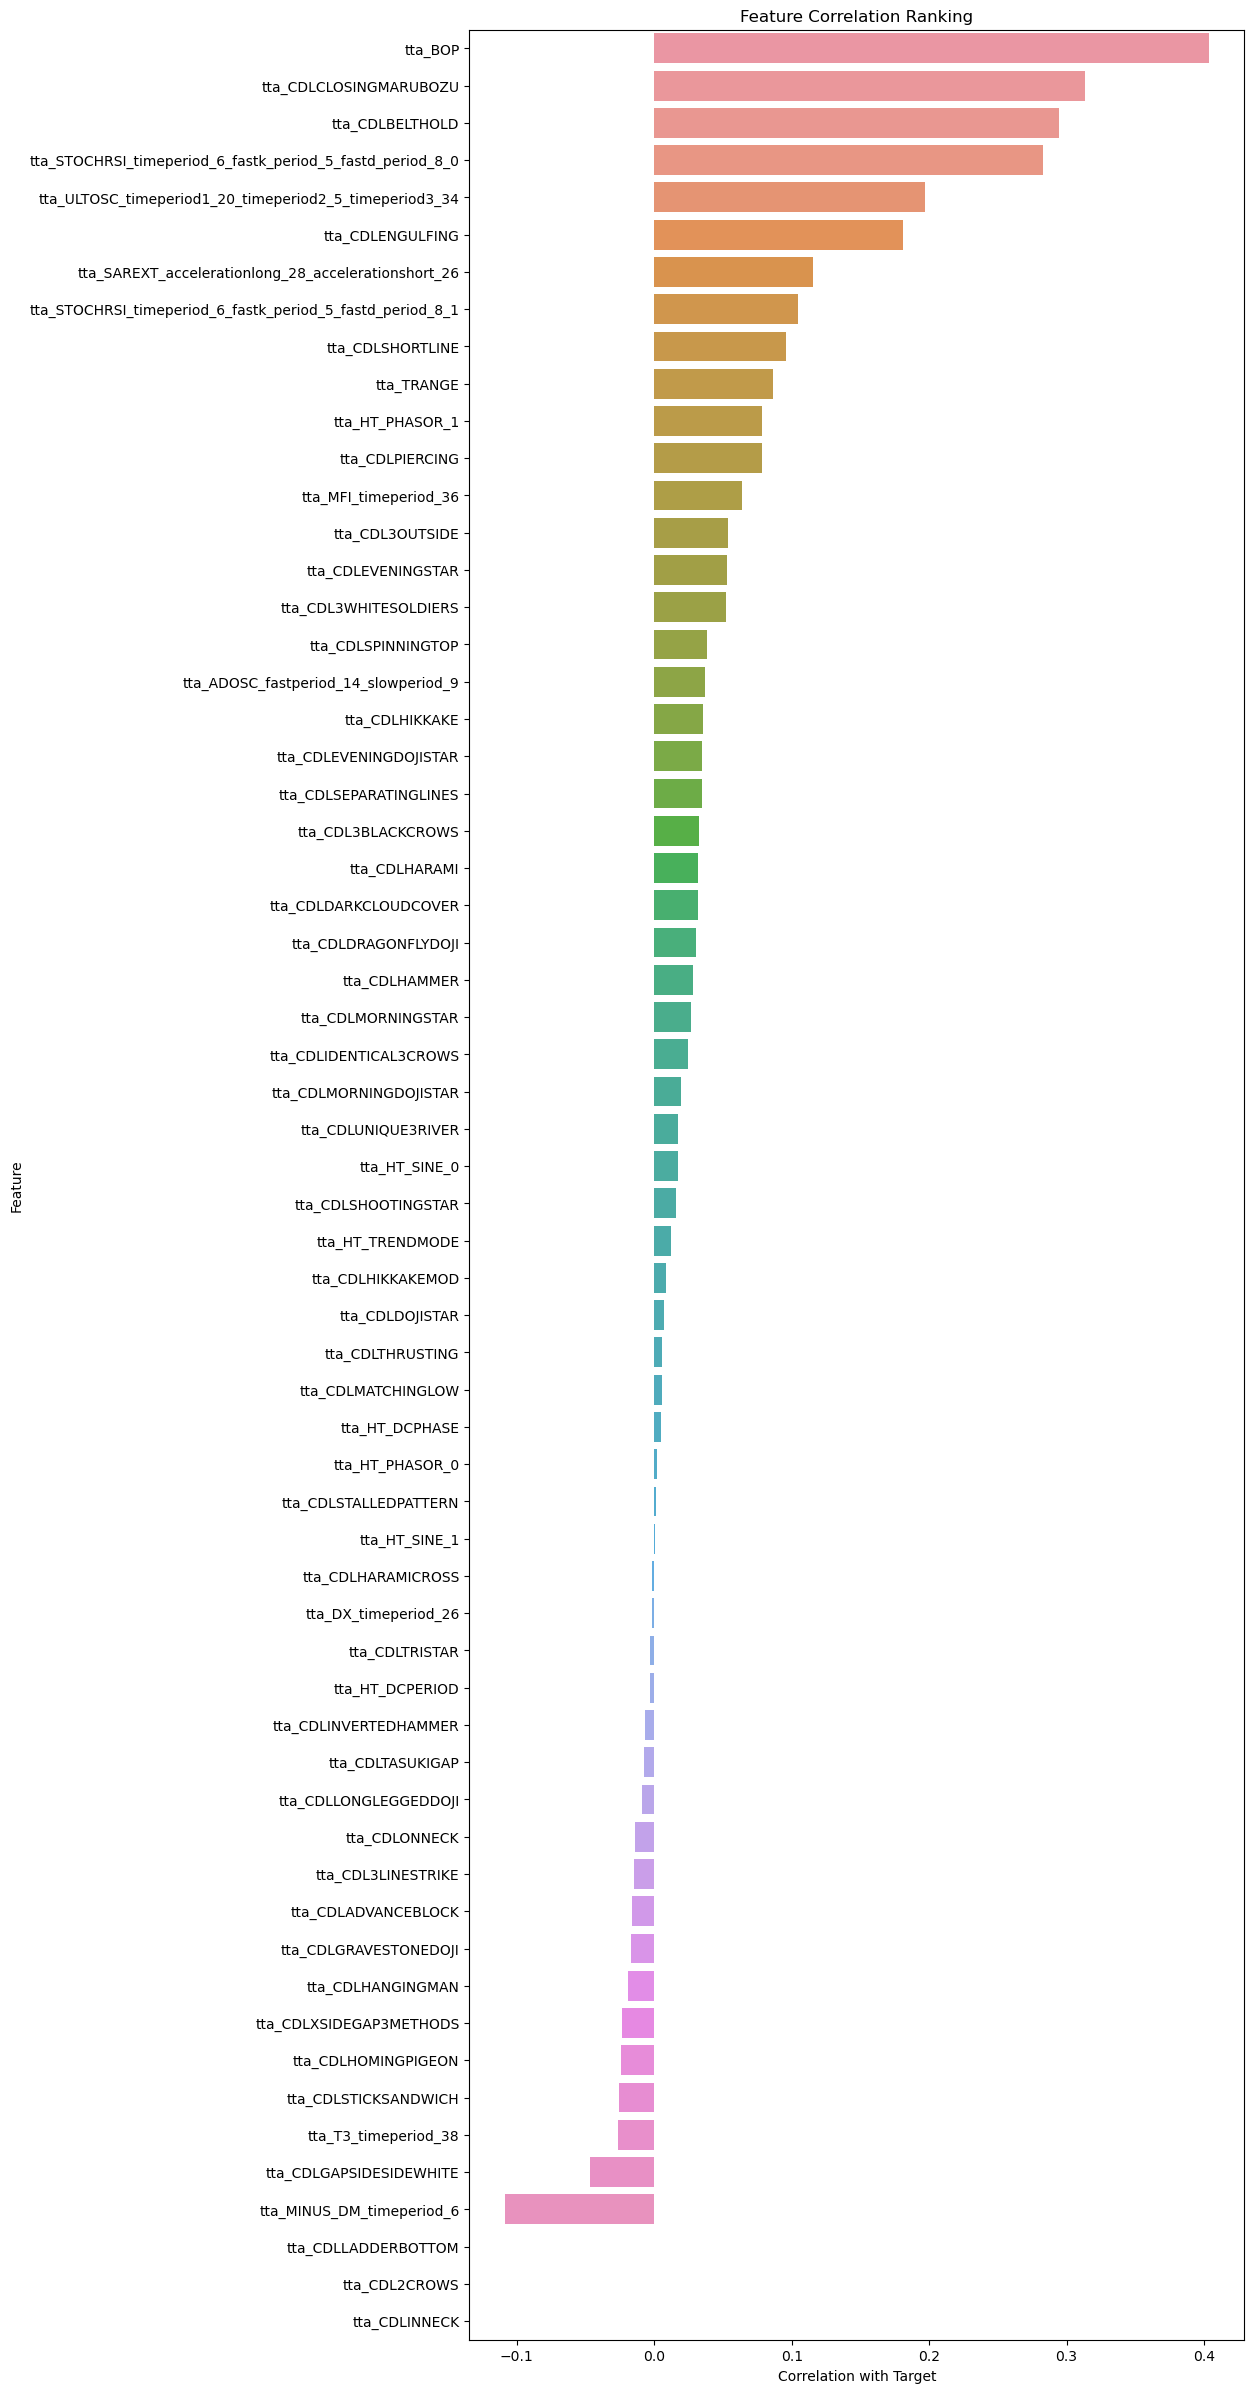

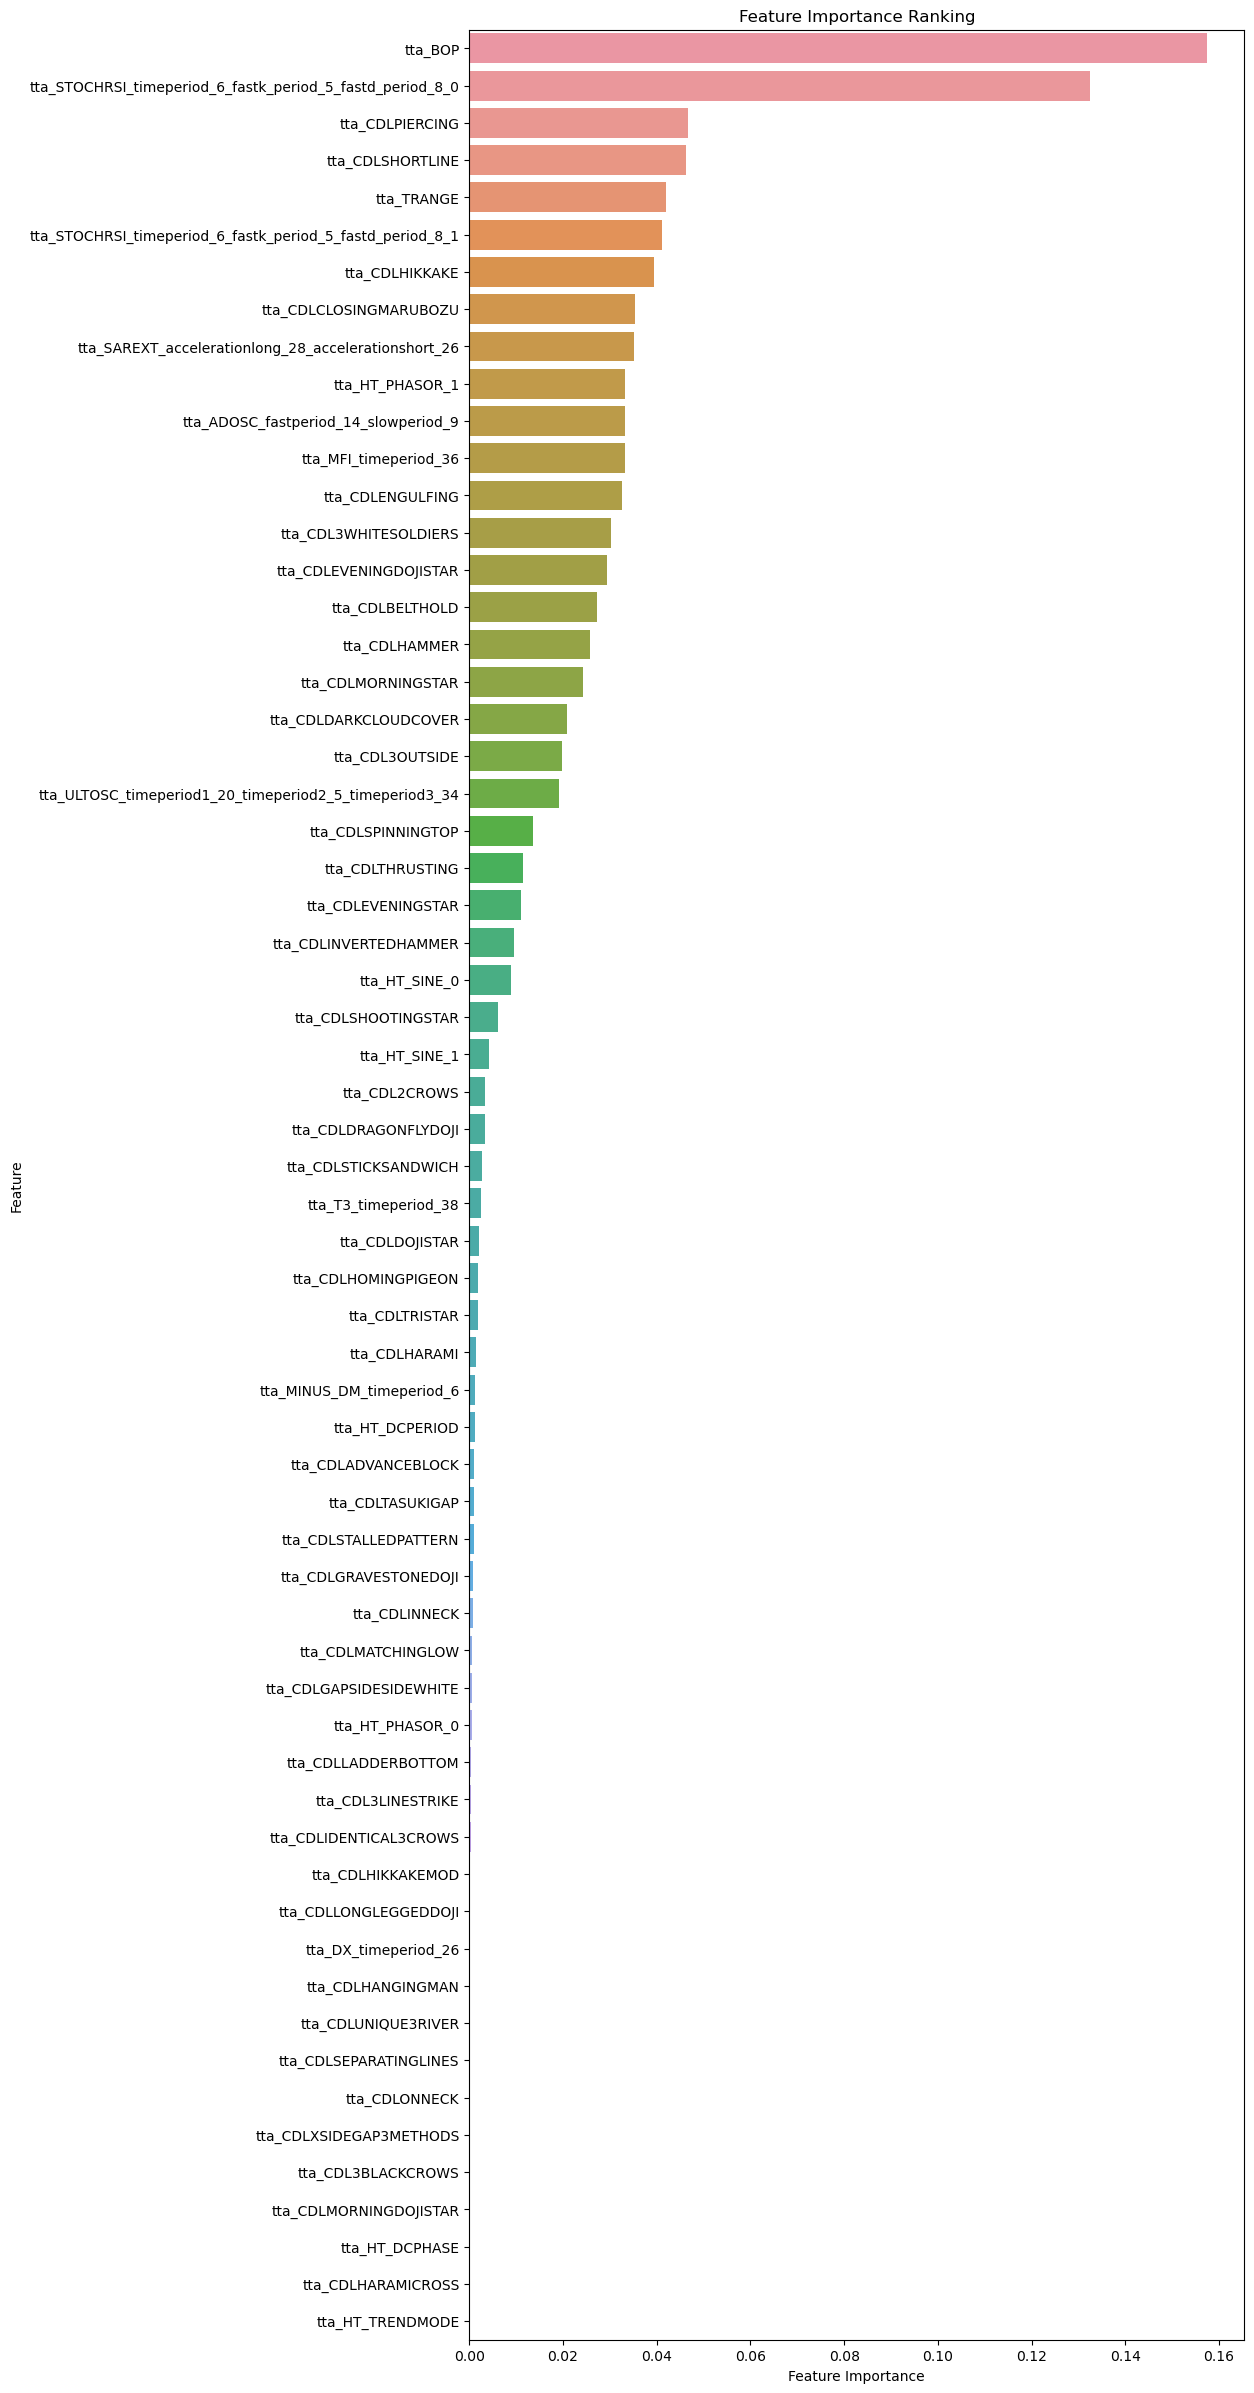

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor

# Load your dataset into a DataFrame (replace 'your_data.csv' with the actual filename)
df = pd.read_csv('test_withF_Avg_1min.csv', index_col='Timestamp')

# Calculate correlation matrix
correlation_matrix = df.corr()

# Calculate correlation with respect to the target variable
target_column = 'Target_Avg_1min'  # Replace with your target column name
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop(correlation_with_target.index[0])

# Split data into features (X) and target (y)
X = df.drop(columns=['Target_Avg_1min'])  # Drop columns you don't need for modeling
y = df['Target_Avg_1min']

# Initialize an ExtraTreesRegressor model
model = ExtraTreesRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature correlation and importance
feature_info = pd.DataFrame({'Correlation': correlation_with_target, 'Importance': feature_importances})

# Sort feature_info by correlation and importance
feature_info_sorted_corr = feature_info.sort_values(by='Correlation', ascending=False)
feature_info_sorted_importance = feature_info.sort_values(by='Importance', ascending=False)

# Plot the correlation ranking
plt.figure(figsize=(10, 30))
sns.barplot(data=feature_info_sorted_corr, x='Correlation', y=feature_info_sorted_corr.index)
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.title('Feature Correlation Ranking')
plt.show()

# Plot the feature importance ranking
plt.figure(figsize=(10, 30))
sns.barplot(data=feature_info_sorted_importance, x='Importance', y=feature_info_sorted_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.show()
